<a href="https://colab.research.google.com/github/Sabrina-Hendricks/DS4002-Group13-Project2/blob/main/Scripts/DataAppendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Import data from Github

In [2]:
url = 'https://raw.githubusercontent.com/Sabrina-Hendricks/DS4002-Group13-Project2/refs/heads/main/Data/HealthCareOriginalData.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,2004,2004.1,2004.2,2004.3,2005,2005.1,2005.2,2005.3,2006,...,2022,2022.1,2022.2,2022.3,2023,2023.1,2023.2,2023.3,2024,2024.1
0,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,...,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2
1,Health care,1202.0,1226.0,1252.5,1275.0,1291.9,1309.5,1333.2,1347.6,1362.2,...,2753.8,2772.7,2835.3,2901.0,2983.3,3029.9,3068.6,3148.8,3233.6,3274.3
2,Outpatient services,575.6,585.0,594.6,601.8,613.0,621.1,628.1,635.4,639.2,...,1285.3,1306.6,1321.2,1346.6,1402.7,1420.2,1444.2,1481.1,1519.8,1554.7
3,Physician services (44),306.6,311.7,316.7,321.9,327.6,332.3,336.3,339.5,341.8,...,662.4,672.2,681.4,692.3,717.7,733.5,736.8,751.4,765.7,785.6
4,Dental services (45),81.0,82.5,84.2,85.4,86.7,87.7,88.1,89.0,89.7,...,158.6,160.4,163.4,165.7,170.7,171.3,173.3,175.4,180.2,183.9


Clean the data to make it in a readable/analyzable format

In [3]:
# Filter rows to keep only the specified services
services_to_keep = ['Physician services (44)', 'Dental services (45)', 'Paramedical services (46)',
                    'Hospitals (51)', 'Nursing homes (52)']
df_filtered = df[df['Unnamed: 0'].isin(services_to_keep)]

# Melt the dataframe to get it into long format for analysis
df_melted = df_filtered.melt(id_vars=['Unnamed: 0'], var_name='year_quarter', value_name='spending')

# Split 'year_quarter' into separate year and quarter columns
df_melted['year'] = df_melted['year_quarter'].apply(lambda x: x.split('.')[0])
df_melted['quarter'] = df_melted['year_quarter'].apply(lambda x: 'Q' + str(int(x.split('.')[1])+1) if '.' in x else 'Q1')

# Ensure that the 'spending' column is numeric
df_melted['spending'] = pd.to_numeric(df_melted['spending'], errors='coerce')

# Drop unnecessary 'year_quarter' column
df_melted = df_melted.drop(columns=['year_quarter'])

# Clean up the service names (remove the numbers in parentheses)
df_melted['Unnamed: 0'] = df_melted['Unnamed: 0'].apply(lambda x: re.sub(r'\s\(\d+\)', '', x))

# Map services to categories
category_map = {
    'Physician services': 'Outpatient services',
    'Dental services': 'Outpatient services',
    'Paramedical services': 'Outpatient services',
    'Hospitals': 'Hospital and nursing home services',
    'Nursing homes': 'Hospital and nursing home services'
}

# Add a 'category' column based on the service
df_melted['category'] = df_melted['Unnamed: 0'].map(category_map)

# Rename 'Unnamed: 0' to 'service' for clarity
df_melted = df_melted.rename(columns={'Unnamed: 0': 'service'})

# Rearrange columns to desired order
df_melted = df_melted[['category', 'service', 'year', 'quarter', 'spending']]

df_melted #this is the clean dataset - use this code for datacleaning***

,category,service,year,quarter,spending
0,Outpatient services,Physician services,2004,Q1,306.6
1,Outpatient services,Dental services,2004,Q1,81.0
2,Outpatient services,Paramedical services,2004,Q1,188.0
3,Hospital and nursing home services,Hospitals,2004,Q1,518.4
4,Hospital and nursing home services,Nursing homes,2004,Q1,108.0
...,...,...,...,...,...
405,Outpatient services,Physician services,2024,Q2,785.6
406,Outpatient services,Dental services,2024,Q2,183.9
407,Outpatient services,Paramedical services,2024,Q2,585.1
408,Hospital and nursing home services,Hospitals,2024,Q2,1475.0


EDA

Overall trends over time:

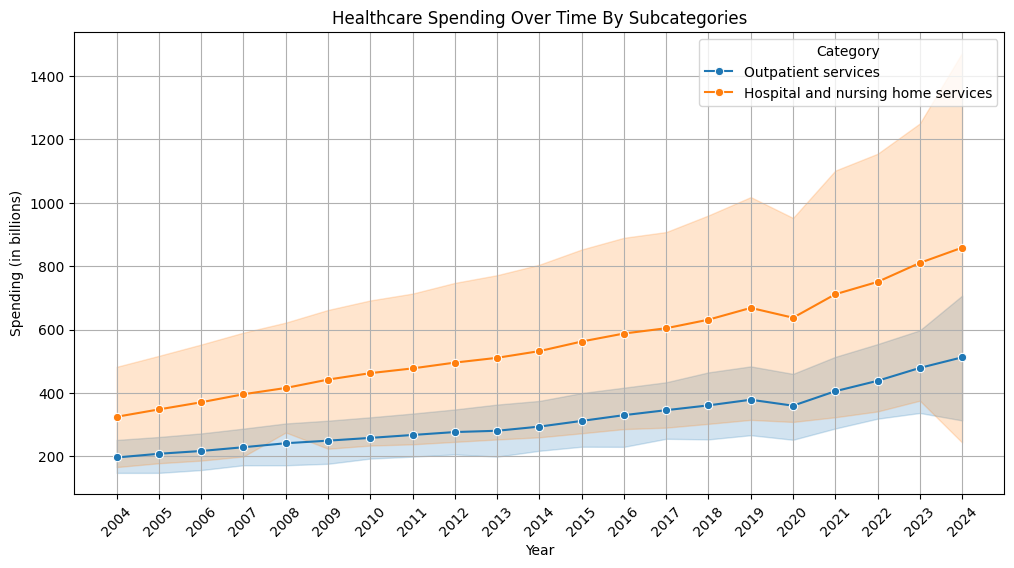

In [4]:
# Trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='year', y='spending', hue='category', marker='o')
plt.title('Healthcare Spending Over Time By Subcategories')
plt.xticks(rotation=45)
plt.ylabel('Spending (in billions)')
plt.xlabel('Year')
plt.legend(title='Category')
plt.grid()
plt.show()

Amount of spending for each service

<ipython-input-5-a0e040536b77>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outpatient_agg, x='service', y='spending', palette='Blues_d')
<ipython-input-5-a0e040536b77>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hospital_agg, x='service', y='spending', palette='Oranges_d')


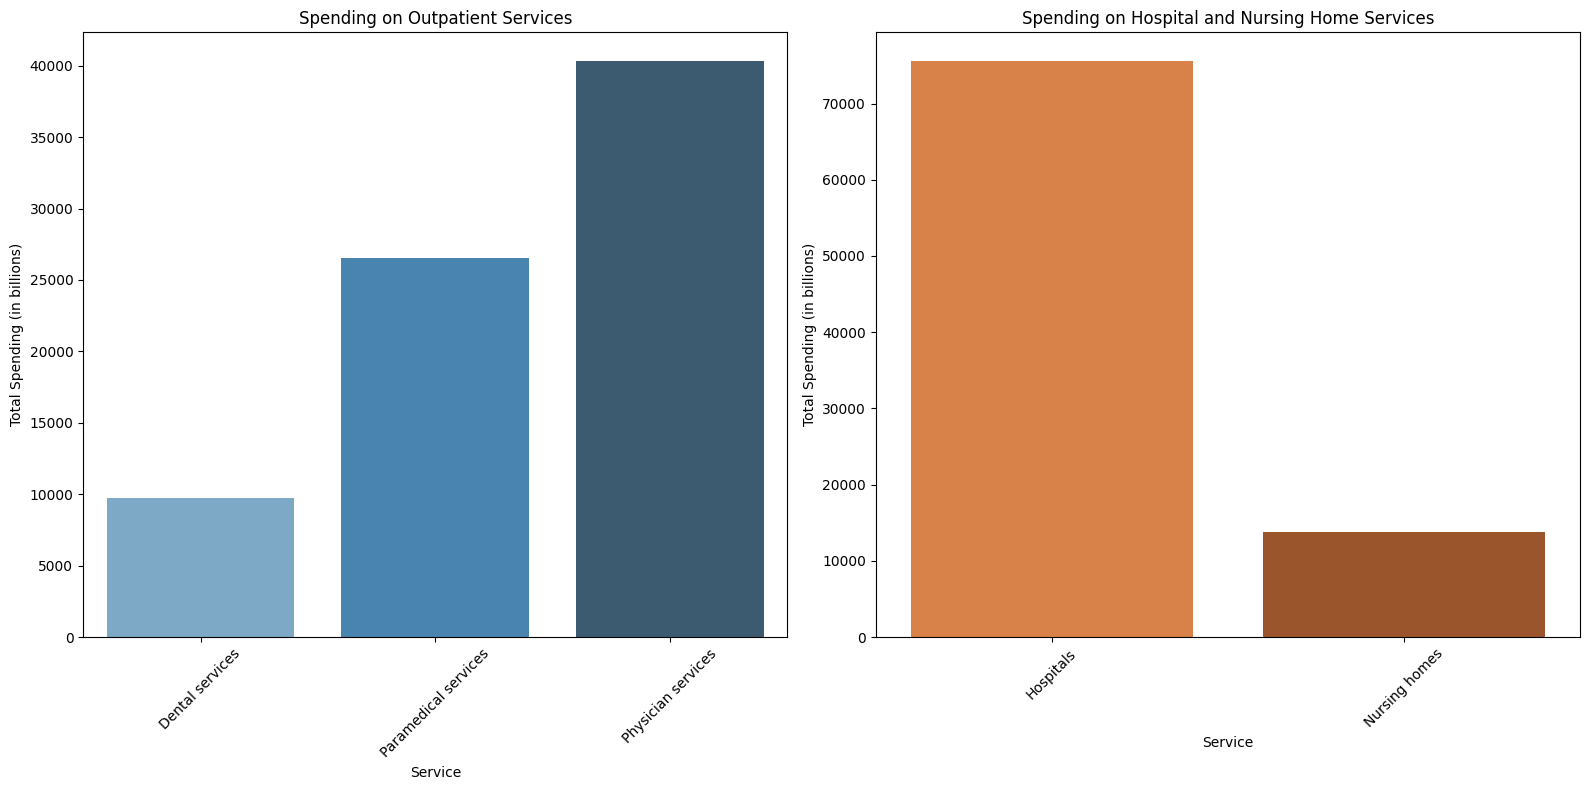

In [5]:
# Filter for the relevant categories
outpatient_data = df_melted[df_melted['category'] == 'Outpatient services']
hospital_data = df_melted[df_melted['category'] == 'Hospital and nursing home services']

# Aggregate spending by service within each category
outpatient_agg = outpatient_data.groupby('service')['spending'].sum().reset_index()
hospital_agg = hospital_data.groupby('service')['spending'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the first bar graph for Outpatient Services
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(data=outpatient_agg, x='service', y='spending', palette='Blues_d')
plt.title('Spending on Outpatient Services')
plt.xlabel('Service')
plt.ylabel('Total Spending (in billions)')
plt.xticks(rotation=45)

# Create the second bar graph for Hospital and Nursing Home Services
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(data=hospital_agg, x='service', y='spending', palette='Oranges_d')
plt.title('Spending on Hospital and Nursing Home Services')
plt.xlabel('Service')
plt.ylabel('Total Spending (in billions)')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Analyzing outliers

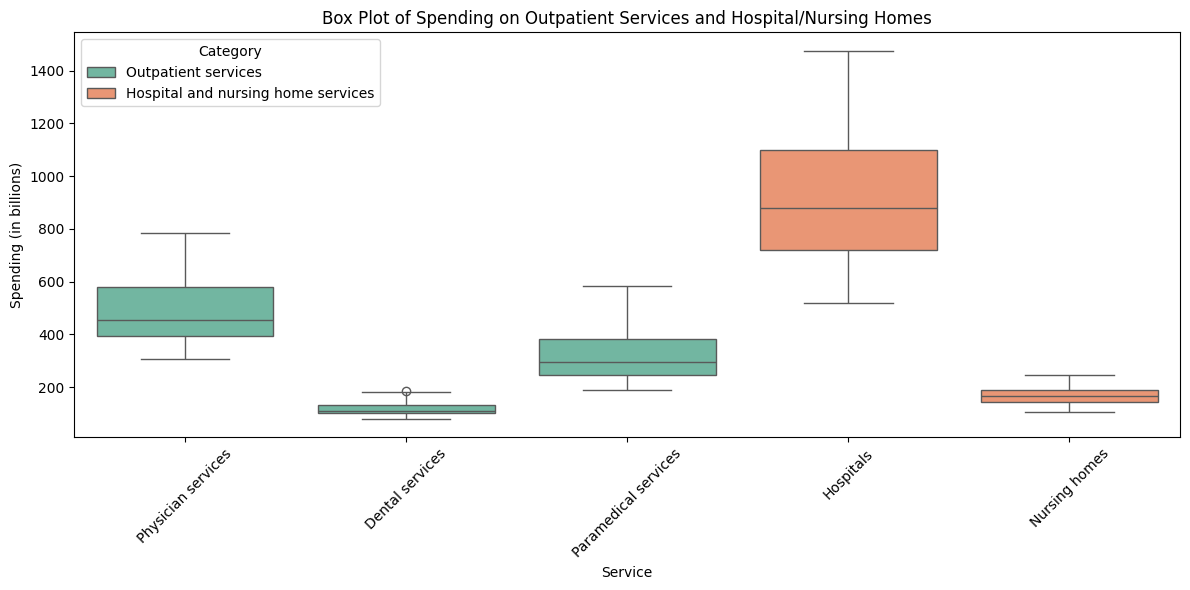

In [6]:
# Filter for Outpatient Services and Hospital/Nursing Homes
outpatient_data = df_melted[df_melted['category'] == 'Outpatient services']
hospital_data = df_melted[df_melted['category'] == 'Hospital and nursing home services']

# Combine both datasets for plotting
combined_data = pd.concat([outpatient_data, hospital_data])

# Create a box plot for both categories side by side
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='service', y='spending', hue='category', palette='Set2')

# Customize the plot
plt.title('Box Plot of Spending on Outpatient Services and Hospital/Nursing Homes')
plt.xlabel('Service')
plt.ylabel('Spending (in billions)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.legend(title='Category')
plt.show()

In [10]:
outpatient_data.describe()

,spending
count,246.000000
mean,311.379268
std,178.965495
min,81.000000
25%,134.975000
50%,297.300000
75%,435.525000
max,785.600000


In [12]:
hospital_data.describe()

,spending
count,164.000000
mean,544.767073
std,418.796143
min,108.000000
25%,167.250000
50%,381.550000
75%,877.150000
max,1475.000000


In [13]:
physician_spending = outpatient_data[outpatient_data['service'] == 'Physician services']
physician_spending.describe()

,spending
count,82.000000
mean,491.737805
std,124.758162
min,306.600000
25%,393.700000
50%,456.200000
75%,578.925000
max,785.600000


In [14]:
dental_spending = outpatient_data[outpatient_data['service'] == 'Dental services']
dental_spending.describe()

,spending
count,82.000000
mean,119.041463
std,25.873500
min,81.000000
25%,101.850000
50%,110.050000
75%,134.625000
max,183.900000


In [15]:
paramedical_spending = outpatient_data[outpatient_data['service'] == 'Paramedical services']
paramedical_spending.describe()

,spending
count,82.000000
mean,323.358537
std,100.578939
min,188.000000
25%,245.450000
50%,297.300000
75%,384.150000
max,585.100000


In [16]:
hospital_spending = hospital_data[hospital_data['service'] == 'Hospitals']
hospital_spending.describe()

,spending
count,82.000000
mean,921.521951
std,254.044442
min,518.400000
25%,720.425000
50%,880.000000
75%,1097.400000
max,1475.000000


In [17]:
nursing_home_spending = hospital_data[hospital_data['service'] == 'Nursing homes']
nursing_home_spending.describe()

,spending
count,82.000000
mean,168.012195
std,31.841465
min,108.000000
25%,144.525000
50%,166.800000
75%,189.775000
max,244.700000
